In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
from matplotlib.ticker import ScalarFormatter

In [28]:
df_raw = pd.read_csv("dropout_rate.csv", sep=";", encoding="utf-8-sig")

In [29]:
quantitative_cols = [
    'Application order', 
    'Age at enrollment', 
    'Curricular units 1st sem (approved)', 
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (approved)', 
    'Curricular units 2nd sem (grade)',
]

df_bin_target = df_raw[df_raw['Target'] != 'Enrolled'].copy()

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_minmax = df_bin_target[quantitative_cols + ['Target']].copy()

df_minmax[quantitative_cols] = scaler.fit_transform(df_minmax[quantitative_cols])

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standard = df_bin_target[quantitative_cols + ['Target']].copy()
df_standard[quantitative_cols] = scaler.fit_transform(df_standard[quantitative_cols])

In [32]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust = df_bin_target[quantitative_cols + ['Target']].copy()
df_robust[quantitative_cols] = scaler.fit_transform(df_robust[quantitative_cols])

In [33]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
df_maxabs = df_bin_target[quantitative_cols + ['Target']].copy()
df_maxabs[quantitative_cols] = scaler.fit_transform(df_maxabs[quantitative_cols])

In [34]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
df_quantile = df_bin_target[quantitative_cols + ['Target']].copy()
df_quantile[quantitative_cols] = scaler.fit_transform(df_quantile[quantitative_cols])

In [45]:
dfs = {
    "Bin Target (raw)": df_bin_target,
    "Min-Max":            df_minmax,
    "Standard":           df_standard,
    "Robust":             df_robust,
    "MaxAbs":             df_maxabs,
    "Quantile":           df_quantile,
}

def summarize(col: pd.Series) -> list:
    q25, q50, q75 = col.quantile([.25, .50, .75])
    mode_val = col.mode().iloc[0] if not col.mode().empty else pd.NA
    mean = col.mean()
    std = col.std()
    
    # Avoid division by zero or near-zero mean
    if abs(mean) < 1e-8:
        cv = pd.NA
    else:
        cv = std / mean

    return [
        mean,
        col.min(),
        q25,
        q50,
        q75,
        col.max(),
        mode_val,
        col.var(),
        std,
        cv,
        q75 - q25
    ]


stats_index = [
    "Mean",
    "Min",
    "25th Percentile",
    "Median",
    "75th Percentile",
    "Max",
    "Mode",
    "Variance",
    "Standard Deviation",
    "Coefficient of Variation",
    "IQR",
]

summary_table = pd.DataFrame(
    {name: summarize(df["Curricular units 1st sem (grade)"]) for name, df in dfs.items()},
    index=stats_index
).round(3)

summary_table = summary_table.applymap(
    lambda x: (
        "0" if abs(x) < 1e-8 else f"{x:.3f}".rstrip("0").rstrip(".")
    ) if pd.notnull(x) else ""
)


pd.options.display.float_format = '{:.3f}'.format
summary_table

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3184\4189501085.py:56: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary_table = summary_table.applymap(


,Bin Target (raw),Min-Max,Standard,Robust,MaxAbs,Quantile
Mean,10.535,0.558,0,-0.723,0.558,0.484
Min,0,0,-2.083,-4.937,0,0
25th Percentile,11,0.583,0.092,-0.537,0.583,0.249
Median,12.341,0.654,0.357,0,0.654,0.5
75th Percentile,13.5,0.715,0.586,0.463,0.715,0.754
Max,18.875,1,1.649,2.613,1,1
Mode,0,0,-2.083,-4.937,0,0
Variance,25.58,0.072,1,4.093,0.072,0.097
Standard Deviation,5.058,0.268,1,2.023,0.268,0.312
Coefficient of Variation,0.48,0.48,,-2.8,0.48,0.644


In [46]:
print(summary_table.to_latex())

\begin{tabular}{lllllll}
\toprule
 & Bin Target (raw) & Min-Max & Standard & Robust & MaxAbs & Quantile \\
\midrule
Mean & 10.535 & 0.558 & 0 & -0.723 & 0.558 & 0.484 \\
Min & 0 & 0 & -2.083 & -4.937 & 0 & 0 \\
25th Percentile & 11 & 0.583 & 0.092 & -0.537 & 0.583 & 0.249 \\
Median & 12.341 & 0.654 & 0.357 & 0 & 0.654 & 0.5 \\
75th Percentile & 13.5 & 0.715 & 0.586 & 0.463 & 0.715 & 0.754 \\
Max & 18.875 & 1 & 1.649 & 2.613 & 1 & 1 \\
Mode & 0 & 0 & -2.083 & -4.937 & 0 & 0 \\
Variance & 25.58 & 0.072 & 1 & 4.093 & 0.072 & 0.097 \\
Standard Deviation & 5.058 & 0.268 & 1 & 2.023 & 0.268 & 0.312 \\
Coefficient of Variation & 0.48 & 0.48 &  & -2.8 & 0.48 & 0.644 \\
IQR & 2.5 & 0.132 & 0.494 & 1 & 0.132 & 0.505 \\
\bottomrule
\end{tabular}



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3184\4156575337.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


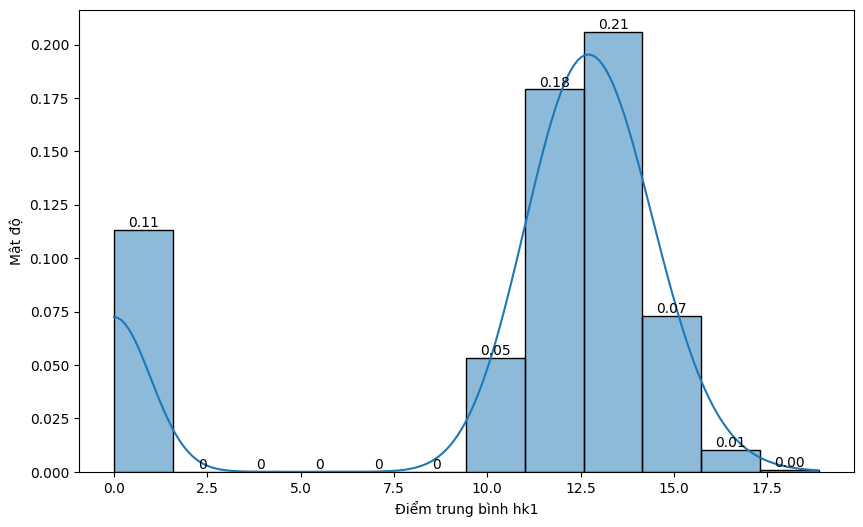

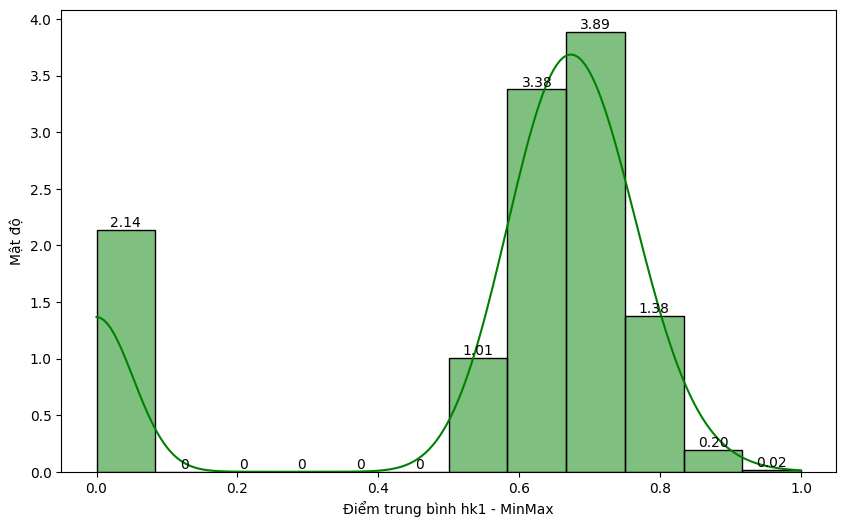

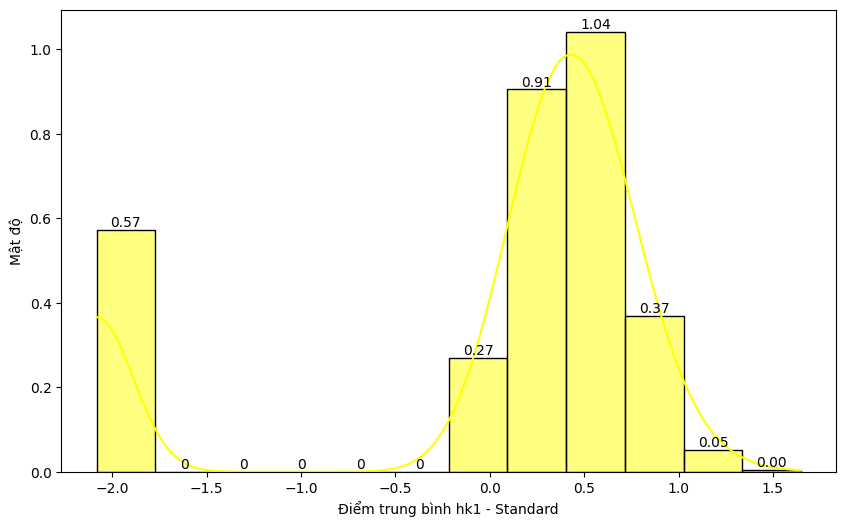

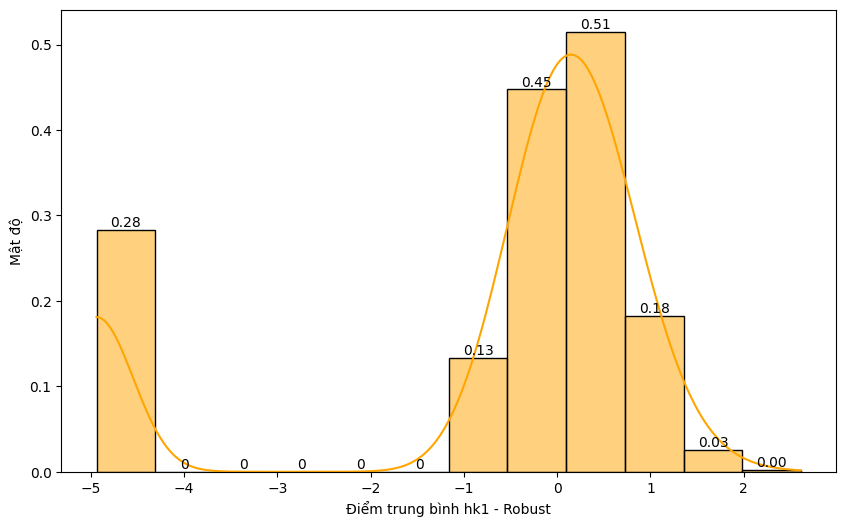

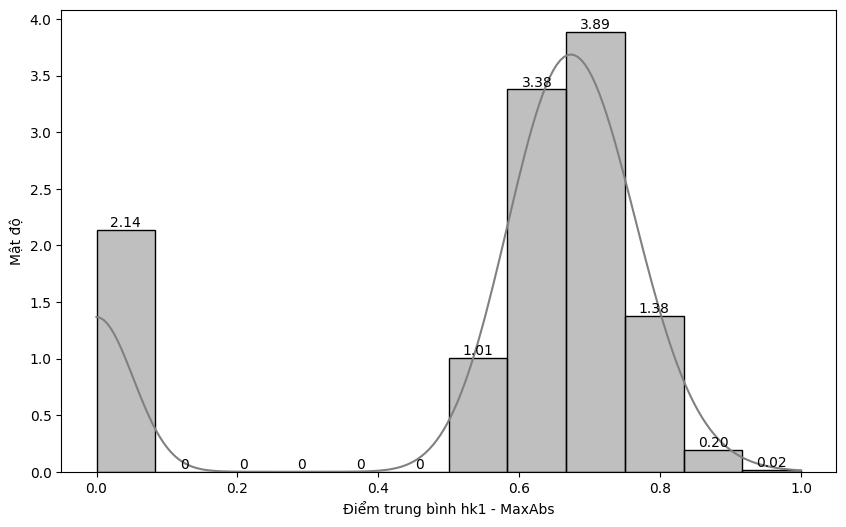

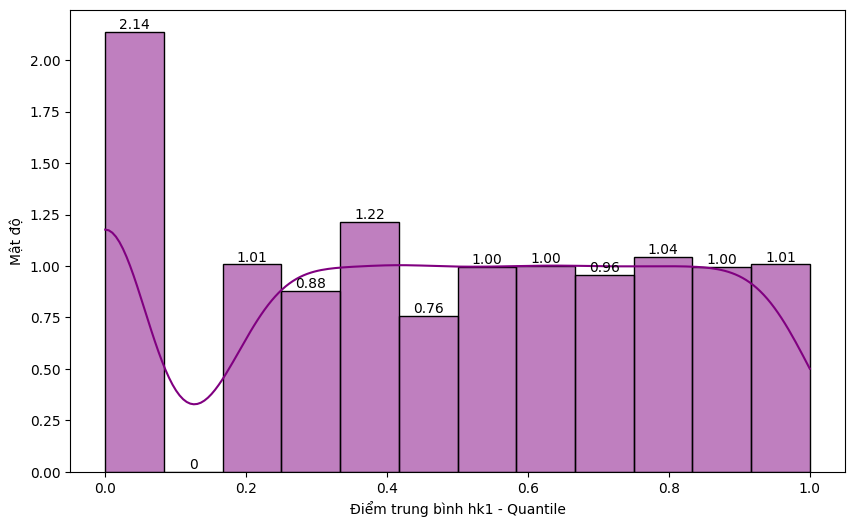

In [53]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data=df_bin_target,
    x='Curricular units 1st sem (grade)',
    #hue='Target',
    palette='Set1',
    hue_order=['Dropout', 'Graduate'],
    kde=True,
    stat='density',
    legend=False,
    bins=12
)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{p.get_height():.2f}' if p.get_height() != 0 else '0',
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Điểm trung bình hk1')
plt.ylabel('Mật độ')
plt.show()
# --------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_minmax,
    x='Curricular units 1st sem (grade)',
    color='green',
    kde=True,
    stat='density',
    legend=False,
    bins=12
)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{p.get_height():.2f}' if p.get_height() != 0 else '0',
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Điểm trung bình hk1 - MinMax')
plt.ylabel('Mật độ')
plt.show()

# --------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_standard,
    x='Curricular units 1st sem (grade)',
    color='yellow',
    kde=True,
    stat='density',
    legend=False,
    bins=12
)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{p.get_height():.2f}' if p.get_height() != 0 else '0',
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Điểm trung bình hk1 - Standard')
plt.ylabel('Mật độ')
plt.show()

# --------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_robust,
    x='Curricular units 1st sem (grade)',
    color='orange',
    kde=True,
    stat='density',
    legend=False,
    bins=12
)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{p.get_height():.2f}' if p.get_height() != 0 else '0',
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Điểm trung bình hk1 - Robust')
plt.ylabel('Mật độ')
plt.show()

# --------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_maxabs,
    x='Curricular units 1st sem (grade)',
    color='gray',
    kde=True,
    stat='density',
    legend=False,
    bins=12
)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{p.get_height():.2f}' if p.get_height() != 0 else '0',
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Điểm trung bình hk1 - MaxAbs')
plt.ylabel('Mật độ')
plt.show()

# --------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_quantile,
    x='Curricular units 1st sem (grade)',
    color='purple',
    kde=True,
    stat='density',
    legend=False,
    bins=12
)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{p.get_height():.2f}' if p.get_height() != 0 else '0',
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Điểm trung bình hk1 - Quantile')
plt.ylabel('Mật độ')
plt.show()